# SF Crime Statistics





First, initialize matplotlib, pandas, and numpy

In [111]:
# The usual preamble
%matplotlib inline
#%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 100)

plt.rcParams['figure.figsize'] = (15, 5)
def getMap(df,column):
    indexMap = {}
    for i,value in enumerate(df[column].value_counts().index):
        indexMap[value]=i
    return indexMap

Load training and test data.
Take a look at the training data

In [112]:
sfcrime_train = pd.read_csv('../data/train.csv',parse_dates='Dates',index_col='Dates')
sfcrime_test = pd.read_csv('../data/test.csv',parse_dates='Dates',index_col='Dates')
sfcrime_train

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601


# Studying the data

What are the different types of crimes? And how often do they occur?

In [113]:
sfcrime_train['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

Variations by location

Do these seem to vary by time?
Setup some plotting code

In [114]:
def crime_by_time(df,crime,unit="Hour"):
    """
    Create index based on timing criteria
    """
    crime = df[df['Category'] == crime].copy()
    if unit=="Hour":
        crime.loc[:,unit] = crime.index.hour
    elif unit=="Day":
        crime.loc[:,unit] = crime.index.dayofyear
    elif unit=="Year":
        crime.loc[:,unit] = crime.index.year
    elif unit=="Month":
        crime.loc[:,unit] = crime.index.month
    elif unit=="Weekday":
        crime.loc[:,unit] = crime.index.weekday

    crime[unit].astype(int)
    return crime[unit].value_counts()
def plot_category_vs_feature(df,donorm=False,xlabel=''):
    """
    Plot 2d histogram of crime categories vs some features.
    Assumes as input dataframe with the feature of interest as the index
    and the columns as the crime categories.
    """
 
    df = df.fillna(0)

    #build values and weights for histogram
    (nfeatures,ncategories) = df.shape
    x = []
    y = []
    weights = []
    for i in range(nfeatures):
        for j in range(ncategories):
            weights.append(df.iloc[i,j])
            x.append(i)
            y.append(j)

    #format plot
    fig,ax = plt.subplots(figsize=(15,10))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    for i in range(nfeatures): ax.text(i,-1.5,df.index[i],
                                    horizontalalignment='center')
    for j in range(ncategories):  ax.text(-.7,j,df.columns[j],
                                          horizontalalignment='right',
                                          verticalalignment='center')
    ax.text(nfeatures/2.,-3,xlabel)

    #draw histogram
    x_array = np.array(x)
    y_array = np.array(y)
    weights_array = np.array(weights)
    plt.hist2d(x=x_array,y=y_array,weights=weights_array,
               bins=[np.array([x -.5 for x in range(nfeatures+1)]),
                     np.array([x - .5 for x in range(ncategories+1)])])
    plt.colorbar()
def plot_category_vs_time(df,unit,donorm=False):
    """
    Plot 2d histogram of crime categories vs time
    """
    #build data fram just of categories versus specific unit of time
    dset = {}
    for category,norm in zip(df['Category'].value_counts()[:].index,
                             df['Category'].value_counts()[:]):
        dset[category]=crime_by_time(df,category,unit=unit) 
        #could also look at normalizing each category individually
        if donorm: dset[category] = dset[category].div(norm) 
    combined = pd.DataFrame(dset)
    plot_category_vs_feature(combined,xlabel=unit,donorm=donorm)

Does it vary by weekday? (Monday == 0,..., Sunday ==6)
Here is a plot of how often a given crime occurs per weekday. Each entry is normalized by the total number in the row.

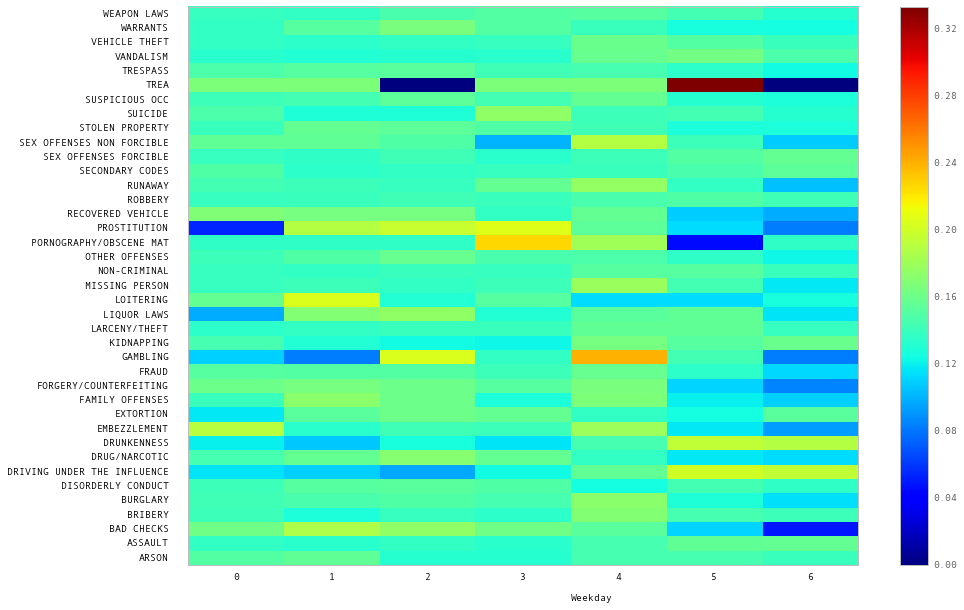

In [5]:
plot_category_vs_time(sfcrime_train,"Weekday",donorm=True)

It seems to. Perhaps surprisingly, most of the crimes seem to occur on weekdays.  

What about by hour? We can do the same thing except plot versus the hour in the day.

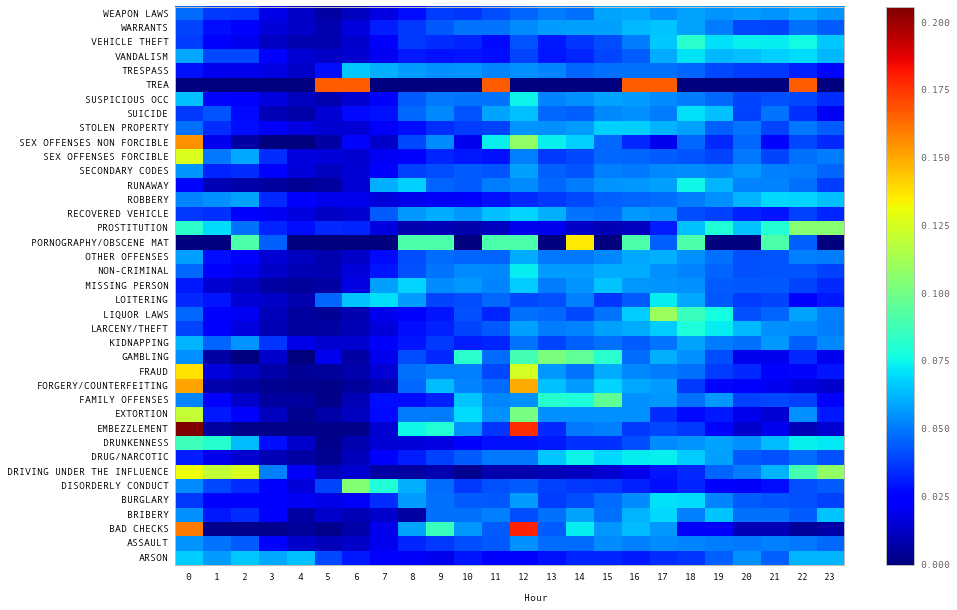

In [6]:
plot_category_vs_time(sfcrime_train,"Hour",donorm=True)

There does seem to be a good deal of dependence on the time of day, which is perhaps not surprising. Some crimes, like gambling and non-criminal offenses occur in the middle of the day. Others, like driving under the influence and prostitution tend to occur in the middle of the night. 

What about by year? It makes sense that maybe the state of crime in SF has changed over the 13 years that the statistics were collected. This time lets look not at the normalized numbers but the absolute number of a given crime per year.

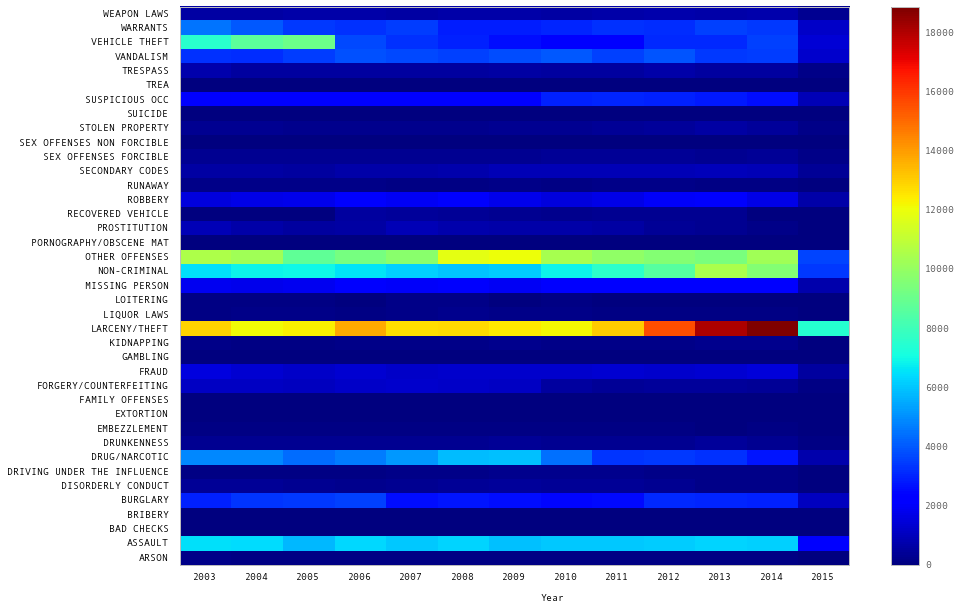

In [7]:
plot_category_vs_time(sfcrime_train,"Year")

Indeed, things like drug crimes seem to have peaked around 2009, while vehicle thefts seem to have gone down since 2003. On the other hand, the most common crime, larceny, has gone up as have things like non-criminal offenses.

Finally, what about by Month? Perhaps some crimes are seasonal.

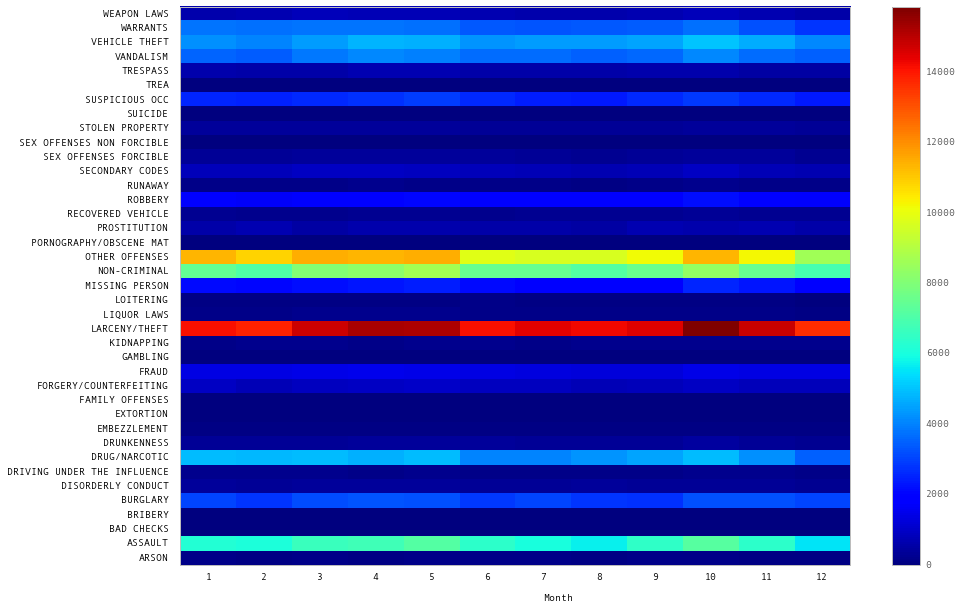

In [8]:
plot_category_vs_time(sfcrime_train,"Month")

Nope. While there may be some small variation, in general the number of crimes in each category seem to be independent of the season.

Since there does seems to be some dependence on time. Especially by year and time of day, let's add these things as individual features.

In [115]:
def set_time_features(df):
    df['Hour'] = df.index.hour
    df['Weekday'] = df.index.weekday
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Day'] = df.index.dayofyear
    return df

sfcrime_train = set_time_features(sfcrime_train)
sfcrime_test = set_time_features(sfcrime_test)

How do the crimes vary by district?

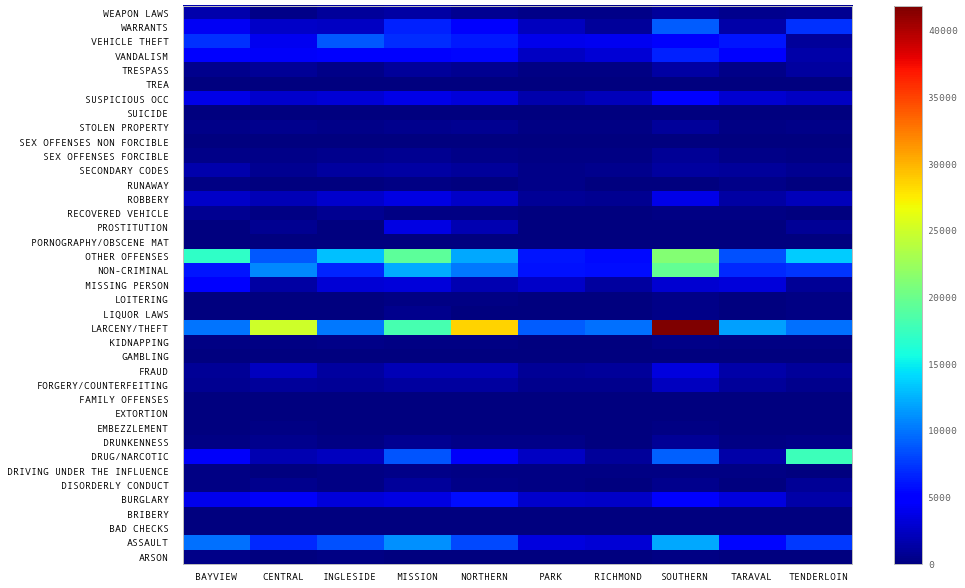

In [10]:
def group_by_district(df, district):
    return df[df['PdDistrict']==district].copy()
#create new data frame of types of crimes per district 
dset = {}
for district in sfcrime_train['PdDistrict'].unique():
    dset[district] = group_by_district(sfcrime_train,
                                       district)['Category'].value_counts()
dfCrimesPerDistrict = pd.DataFrame(dset)
plot_category_vs_feature(dfCrimesPerDistrict.transpose())

Most of the crimes are larceny, drugs, or "other offenses" and they occur mostly in a few districts. But what if we look at where certain crimes are more likely to occur?  Let's normalize each crime category by the total number of crimes in that category. 

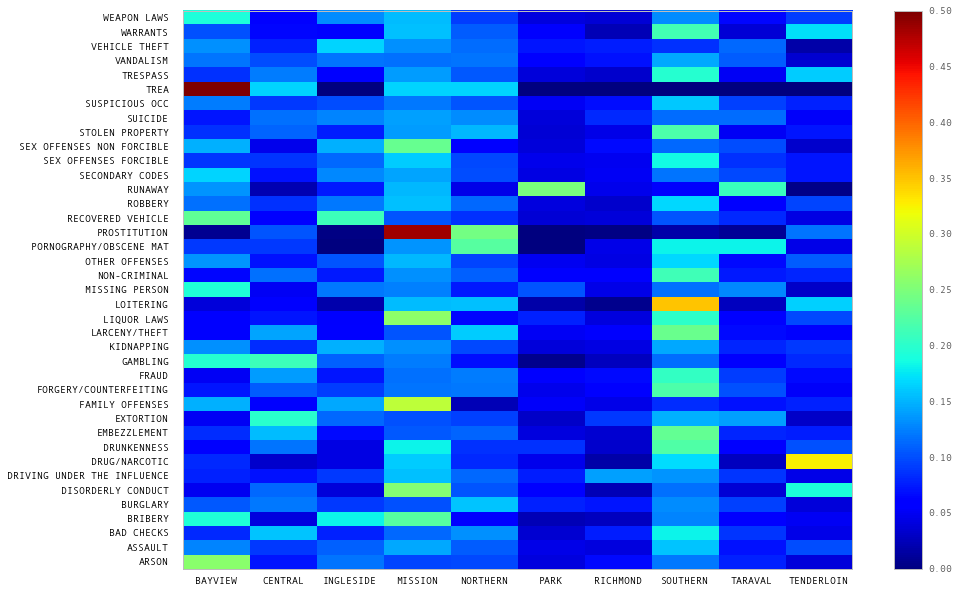

In [11]:
normalizedByCrimeDF = dfCrimesPerDistrict.div(dfCrimesPerDistrict.sum(axis=1), axis=0)
plot_category_vs_feature(normalizedByCrimeDF.transpose())

There are some striking observations here:
- 48% of PROSTITUTION cases occur in the MISSION district with another quarter in NORTHERN
- The TENDERLOIN clearly has a DRUG/NARCOTIC problem with 33% of it's crimes coming from that while in the other districts it's only a few percent.
- ARSON is much more common in BAYVIEW
- DISORDERLY CONDUCT is more common in the MISSION and TENDERLOIN
- DRUNKENNESS is more common in the MISSION and SOUTHERN
- FAMILY OFFSENSE is more common in the MISSION
- FORGERY/COUNTERFEITING is more common in SOUTHERN
- LARCENY/THEFT is more common in SOUTHERN

Clearly this is an important feature. It would be nice to not just have the police district but also it's proximity to other police districts. Here I've attempted to encode this information by adding a feature for each district which tells how close it is to other districts.

In [116]:
def assign_district_proximities(df):
    """Matrix of proximities with rows of districts in alphabetical order
    This should encode geographic proximities (or correlations) 
    between districts
    This should be a symmetric matrix
    if the district is equal (i.e. diagonal) it gets a 1
    if they share a border it gets a 0.5
    if they do not share a border then they get a 0 unless
    the borders 
    are unusual and they
    are very close. In that case I use some judgement and assin 0.25
    BAYVIEW	CENTRAL	INGLESIDE	MISSION	NORTHERN	
    PARK	RICHMOND	SOUTHERN	TARAVAL	TENDERLOIN
    """
    geographicProximity = [[1,0,.5,.5,0,0,0,.5,0,0], #bayview
                           [0,1,0,0,.5,0,0,.5,0,.5],#central
                           [.5,0,1,.5,0,.5,0,0,.5,0], #ingleside
                           [.5,0,.5,1,.25,.5,0,.5,0,.25],#mission
                           [0,.5,0,.25,1,.5,.5,.5,0,.5],#northern
                           [0,0,.5,.5,.5,1,.5,.25,.5,.25], #park
                           [0,0,0,0,.5,.5,1,0,.5,0],#richmond
                           [.5,.5,0,.5,.5,.25,0,1,0,.5], #southern
                           [0,0,.5,0,0,.5,.5,0,1,0], #taraval
                           [0,.5,0,.25,.5,.25,0,.5,0,1] #tenderloin
                           ]
    geographicProximityMatrix = np.matrix(geographicProximity)
    geographicProximityMatrix
    dset={}
    for row,header in zip(geographicProximity,
                          np.sort(df['PdDistrict'].unique())):
        #print row,header
        dset[header]=row
    geographicProximityDF = pd.DataFrame(dset)
    geographicProximityDF.index = np.sort(df['PdDistrict'].unique())

    for district in geographicProximityDF.index:
        districtCol = geographicProximityDF[district][df['PdDistrict']]
        districtCol.index = df.index
        df[district] = districtCol
    #now we have extra features which encode proximity to other districts
assign_district_proximities(sfcrime_train)
assign_district_proximities(sfcrime_test)

The datasets are time ordered. To avoid some kind of bias in the training algorithms, let's shuffle the training data.

In [13]:
import random
def shuffle(df):
    index = list(df.index)
    random.shuffle(index)
    df = df.ix[index]
    df.reset_index()
    return df
sfcrime_train = shuffle(sfcrime_train)

Ok, now let's clean things up for training by removing features we don't want, and encoding the features properly

In [18]:
def get_trainable_df(df,address=True,xy=True,district=True,
                     times=True,category=True):
    """returns new data frame using only features requested and
    creating dummy features for categorical variables"""
    columns = []
    if xy: 
        columns.append(df[['X','Y']])
    if district: 
        columns.append(df[['BAYVIEW','CENTRAL','INGLESIDE',
                          'MISSION','NORTHERN','PARK',
                          'RICHMOND','SOUTHERN','TARAVAL',
                          'TENDERLOIN']])
    if times: 
        columns.append(df[['Hour','Month','Year','Day','Weekday']])
    if address: 
        columns.append(pd.get_dummies(df['Address']))
    if category:
        columns.append(df[['Category']])

    return pd.concat(columns,axis=1)

train = get_trainable_df(sfcrime_train,address=False)
test = get_trainable_df(sfcrime_test,address=False,category=False)

And let's save these as a good measure

In [19]:
train.to_csv('../data/train_munged.csv')
test.to_csv('../data/test_munged.csv')

And put in a checkpoint where we can load the processed data

In [119]:
train = pd.read_csv('../data/train_munged.csv',
                    parse_dates='Dates',index_col='Dates')
test = pd.read_csv('../data/test_munged.csv',
                   parse_dates='Dates',index_col='Dates')

# Stochastic Gradient Decent Classification

A simple out of the box method for classification is to run a SGD classification by minimizing some loss function. This  has the advantage mainly of being fast such that I can run all of the training data.

First though I should split up the data into the training and testing categories. I should also scale the features to have mean 0 and variance 1

In [120]:
X = np.array(train.drop('Category',1))
y = np.array(train['Category'].astype('category'))
#split up training set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

#to be used for training
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#used for submission
X_test_scaled_submission = scaler.transform(np.array(test.drop('Category')))

One simple way to improve the feature set is to approximately map the input features into kernels that are used as new features. Use the Radial Basis Function Kernel.

In [121]:
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_train_features = rbf_feature.fit_transform(X_train_scaled)
X_test_features = rbf_feature.transform(X_test_scaled)
X_test_features_submission = rbf_feature.transform(X_test_scaled_submission)

The SGD classifier doesn't have many parameters, though we do need to determine the regularization parameter, alpha. A grid search over several orders of magnitude for alpha suggests a value of 0.001.

Also, the choice of loss function is important. The log loss function is similar to the one used in the evaluation of the Kaggle submission, so let's use that.

In [122]:
%%time
sgd = SGDClassifier(loss='log',alpha=.001)
sgd.fit(X_train_features, y_train)

CPU times: user 6min 48s, sys: 10.6 s, total: 6min 59s
Wall time: 7min 7s


Pretty fast! How does it do? The score on the training set is.

In [124]:
sgd.score(X_train_features, y_train)

0.22427435408669205

Not terrible. The score on the test set is similar, suggesting there at least isn't much bias.

In [125]:
sgd.score(X_test_features,y_test)

0.22474092687143021

Now we need to extract the predictions for the test set used in the submission.  Each row is one of the crimes while the column corresponds to the predicted probability of the crime belonging to a given category

In [128]:
probs = sgd.predict_proba(X_test_features_submission)
output = pd.DataFrame(probs,columns=sgd.classes_)
output.index.name = 'Id'
output

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.001119,0.093347,0.000886,0.000382,0.043919,0.003904,0.001353,0.043929,0.003376,0.003333,0.000627,0.000532,0.019642,0.030395,0.000198,0.003597,0.172322,0.001447,0.000983,0.042977,0.102981,0.143958,0.000100,0.006180,0.001522,0.019162,0.002672,0.014659,0.008420,0.000375,0.005285,0.000470,0.040798,0.000091,0.006255,0.054785,0.082861,0.032644,0.008510
1,0.001119,0.092840,0.000883,0.000382,0.044712,0.003871,0.001350,0.043766,0.003381,0.003320,0.000626,0.000533,0.019999,0.030302,0.000198,0.003593,0.173791,0.001449,0.000981,0.043363,0.105215,0.141493,0.000100,0.006035,0.001518,0.018906,0.002659,0.014573,0.008392,0.000374,0.005290,0.000469,0.041461,0.000091,0.006242,0.054693,0.081506,0.032054,0.008469
2,0.001074,0.070235,0.000839,0.000369,0.046441,0.003702,0.001289,0.040072,0.003327,0.003208,0.000595,0.000512,0.018640,0.029723,0.000191,0.003376,0.240882,0.001417,0.000968,0.034672,0.101569,0.113584,0.000096,0.006424,0.001444,0.017674,0.002474,0.012811,0.007554,0.000359,0.005032,0.000455,0.034751,0.000088,0.006049,0.056320,0.093536,0.030626,0.007623
3,0.001099,0.078574,0.000867,0.000378,0.048263,0.003858,0.001314,0.045619,0.003324,0.003191,0.000613,0.000523,0.020470,0.030764,0.000195,0.003549,0.198080,0.001441,0.000996,0.039794,0.104523,0.136761,0.000098,0.005938,0.001493,0.017536,0.002545,0.013330,0.007573,0.000368,0.005184,0.000463,0.035167,0.000090,0.006419,0.059201,0.079116,0.033463,0.007821
4,0.001099,0.078574,0.000867,0.000378,0.048263,0.003858,0.001314,0.045619,0.003324,0.003191,0.000613,0.000523,0.020470,0.030764,0.000195,0.003549,0.198080,0.001441,0.000996,0.039794,0.104523,0.136761,0.000098,0.005938,0.001493,0.017536,0.002545,0.013330,0.007573,0.000368,0.005184,0.000463,0.035167,0.000090,0.006419,0.059201,0.079116,0.033463,0.007821
5,0.001084,0.076260,0.000852,0.000372,0.050372,0.003739,0.001298,0.044168,0.003284,0.003161,0.000606,0.000519,0.020866,0.031827,0.000194,0.003390,0.195739,0.001423,0.000991,0.036677,0.099029,0.124082,0.000097,0.005931,0.001470,0.017148,0.002525,0.012616,0.007611,0.000363,0.005090,0.000459,0.034138,0.000089,0.006183,0.057066,0.111300,0.030620,0.007360
6,0.001095,0.079781,0.000867,0.000377,0.048357,0.003829,0.001315,0.047932,0.003307,0.003235,0.000611,0.000523,0.020793,0.030939,0.000195,0.003536,0.195454,0.001445,0.000998,0.039679,0.105790,0.134410,0.000099,0.005848,0.001489,0.017353,0.002528,0.013229,0.007469,0.000369,0.005144,0.000463,0.036594,0.000090,0.006359,0.056024,0.079765,0.034798,0.007912
7,0.001101,0.081085,0.000869,0.000378,0.049174,0.003856,0.001322,0.047433,0.003306,0.003242,0.000609,0.000524,0.020765,0.031082,0.000196,0.003534,0.196515,0.001452,0.001007,0.039879,0.104642,0.127168,0.000099,0.005977,0.001490,0.017472,0.002521,0.013331,0.007560,0.000370,0.005172,0.000464,0.037799,0.000091,0.006330,0.055215,0.084215,0.034776,0.007981
8,0.001084,0.077740,0.000855,0.000374,0.046652,0.003782,0.001306,0.035734,0.003285,0.003165,0.000604,0.000516,0.019729,0.030018,0.000193,0.003410,0.232029,0.001425,0.000980,0.038705,0.110319,0.120988,0.000097,0.006132,0.001473,0.017361,0.002549,0.013430,0.007954,0.000364,0.005117,0.000460,0.036954,0.000089,0.006252,0.052844,0.078762,0.029613,0.007658


Let's save it and submit it to Kaggle

In [13]:
output.to_csv('../data/submission_sgd.csv')

This gives a Kaggle score of 2.69738 where the current best is about 2.05 and the worst is about 34.5.
So, we've got a reasonable result already.  But this was a pretty simple algorithm. Surely we can do better.

# SVM Classifier

To run the SVM, it is actually far too much to train on the whole dataset. Could try to train on separate years.

In [ ]:
from sklearn.svm import LinearSVC,SVC
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler


def do_training(traindf,testdf,sample=10000,year=None,notyear=None,district='',notdistrict='',hours=[]):
    split_traindf = traindf.copy()
    split_testdf = testdf.copy()
    if year!=None:
        split_traindf = split_traindf[split_traindf['Year']==year]
        split_testdf = split_testdf[split_testdf['Year']==year]
    if notyear!=None:
        split_traindf = split_traindf[split_traindf['Year']!=notyear]
        split_testdf = split_testdf[split_testdf['Year']!=notyear]
    if district!='':
        split_traindf = split_traindf[split_traindf[district]==1.0]
        split_testdf = split_testdf[split_testdf[district]==1.0]
    if notdistrict!='':
        split_traindf = split_traindf[split_traindf[notdistrict]!=1.0]
        split_testdf = split_testdf[split_testdf[notdistrict]!=1.0]
    if hours!=[]:
        split_traindf = split_traindf[split_traindf['Hour']>= hours[0]]
        split_traindf = split_traindf[split_traindf['Hour']< hours[1]]
        split_testdf = split_testdf[split_testdf['Hour']>= hours[0]]
        split_testdf = split_testdf[split_testdf['Hour']<hours[1]]
        
    split_traindf = split_traindf[:sample].copy()
    
    X = np.array(split_traindf.drop('Category',1))
    y = np.array(split_traindf['Category'].astype('category'))
    #split up training set
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    scaler = StandardScaler()
    scaler.fit(X_train)

    #to be used for training
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #used for submission
    X_test_scaled_submission = scaler.transform(np.array(split_testdf))
    
    
    #fit
    print "Fitting..."
    svm = SVC(C=10,gamma=.01,probability=True)
    svm.fit(X_train_scaled,y_train)
    
    print "Training Score"
    print svm.score(X_train_scaled, y_train)
    print "Testing Score"
    print svm.score(X_test_scaled,y_test)
    print "Computing probabilities"
    probs = svm.predict_proba(X_test_scaled_submission)
    print "Compute output"
    output = pd.DataFrame(probs,columns=svm.classes_)
    output.index.name = 'Id'
    #reassign index based on original test set
    output.index = split_testdf.index
    print output.shape
    for category in train['Category'].unique():
        if category not in svm.classes_:
            output[category] = 0.
    return output
outputs = []
#could split it even further? night and day?
#reindex so that can keep track of individual days
test_reindexed = test.reset_index().drop('Dates',1)
for year in train['Year'].unique():
    print '='*8,year,'='*8
    for district in sfcrime_train['PdDistrict'].unique():
        print '-'*8,district,'-'*8
        for hours in [[0,7],[7,18],[18,24]]: #this binning would mostly constrain to <10k but not completely
            print '--',hours[0],"<= hour <",hours[1],'--'
            %time outputs.append(do_training(train,test_reindexed,district=district,year=year,hours=hours,sample=10000))   

submissiondf = pd.concat(outputs,axis=0)
submissiondf.index.name = 'Id'
submissiondf = submissiondf.sort_index()

In [117]:
submissiondf

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.003651,0.144588,0.000000,0.003687,0.066328,0.003614,0.013148,0.019865,0.015185,0.005161,0.000000,0.000000,0.000000,0.004469,0.000000,0.000000,0.100280,0.000000,0.000000,0.021114,0.113296,0.137890,0,0.000000,0,0.083771,0.000000,0.009267,0.006634,0.000000,0.004857,0.003782,0.011427,0,0.005499,0.055785,0.121546,0.017477,0.027677
1,0.003083,0.186460,0.000000,0.003198,0.083239,0.003447,0.012272,0.023185,0.013536,0.004379,0.000000,0.000000,0.000000,0.003670,0.000000,0.000000,0.045342,0.000000,0.000000,0.034602,0.082914,0.190026,0,0.000000,0,0.079172,0.000000,0.012948,0.005468,0.000000,0.003491,0.003223,0.009640,0,0.004533,0.052433,0.093445,0.013813,0.032481
2,0.019962,0.052322,0.000000,0.000000,0.076863,0.009006,0.004906,0.041381,0.009111,0.004936,0.000000,0.000000,0.008013,0.026944,0.000000,0.004790,0.139493,0.000000,0.000000,0.007906,0.057089,0.106491,0,0.047317,0,0.036095,0.000000,0.011817,0.005011,0.000000,0.021505,0.000000,0.020857,0,0.012999,0.128108,0.035061,0.086128,0.025889
3,0.001240,0.039796,0.000000,0.002054,0.011140,0.001771,0.002015,0.028208,0.000000,0.000000,0.000000,0.002604,0.002401,0.004132,0.001801,0.002339,0.308451,0.001117,0.000000,0.026024,0.022496,0.117053,0,0.001604,0,0.029339,0.001601,0.005026,0.001628,0.000000,0.011908,0.000000,0.052243,0,0.002117,0.025848,0.278440,0.006881,0.008723
4,0.001240,0.039796,0.000000,0.002054,0.011140,0.001771,0.002015,0.028208,0.000000,0.000000,0.000000,0.002604,0.002401,0.004132,0.001801,0.002339,0.308451,0.001117,0.000000,0.026024,0.022496,0.117053,0,0.001604,0,0.029339,0.001601,0.005026,0.001628,0.000000,0.011908,0.000000,0.052243,0,0.002117,0.025848,0.278440,0.006881,0.008723
5,0.003991,0.075907,0.000000,0.000000,0.012050,0.008008,0.006571,0.004295,0.003689,0.000000,0.000000,0.000000,0.005218,0.018256,0.000000,0.005815,0.180876,0.028666,0.000000,0.089163,0.038039,0.096618,0,0.000000,0,0.018221,0.000000,0.011143,0.004111,0.000000,0.005052,0.000000,0.006781,0,0.007993,0.048752,0.296233,0.014009,0.010542
6,0.000984,0.020873,0.000000,0.001478,0.018355,0.001270,0.001586,0.010326,0.000000,0.000000,0.000000,0.001708,0.001630,0.004208,0.001516,0.001962,0.404777,0.000928,0.000000,0.018023,0.030522,0.059058,0,0.001329,0,0.022018,0.001377,0.001817,0.001362,0.000000,0.010800,0.000000,0.010957,0,0.002033,0.056585,0.298432,0.004874,0.009211
7,0.000950,0.020348,0.000000,0.001351,0.017107,0.001192,0.001553,0.009805,0.000000,0.000000,0.000000,0.001539,0.001627,0.003180,0.001422,0.001668,0.439263,0.000923,0.000000,0.008384,0.026586,0.050678,0,0.001400,0,0.018869,0.001322,0.002011,0.001625,0.000000,0.008496,0.000000,0.008199,0,0.001993,0.037895,0.310657,0.003959,0.015994
8,0.001839,0.121623,0.000952,0.001989,0.086406,0.001624,0.004182,0.012981,0.019525,0.000000,0.001130,0.001998,0.008067,0.018778,0.000000,0.003049,0.229561,0.001498,0.000000,0.004242,0.169698,0.074028,0,0.000000,0,0.019346,0.000000,0.004166,0.002173,0.001090,0.003022,0.000000,0.056869,0,0.004079,0.063579,0.029739,0.042424,0.010345


In [110]:
submissiondf.to_csv('../data/submission_svm_split.csv')

Gives a score of 2.64332 on Kaggle (current best)